### 수박 1000원, 개수 2 추가하여 사과,귤, 수박, 세금에 대한 영향
  
사과, 수박 ,귤의 가격이 최종 금액에 어떻게 영향을 주는가 를 미분으로 확인  
 - 사과에 대한 지불 금액의 미분 
 - 귤에 대한 지불 금액의 미분
 - 수박에 대한 지불 금액의 미분
 - 소비세에 대한 지불 금액의 미분

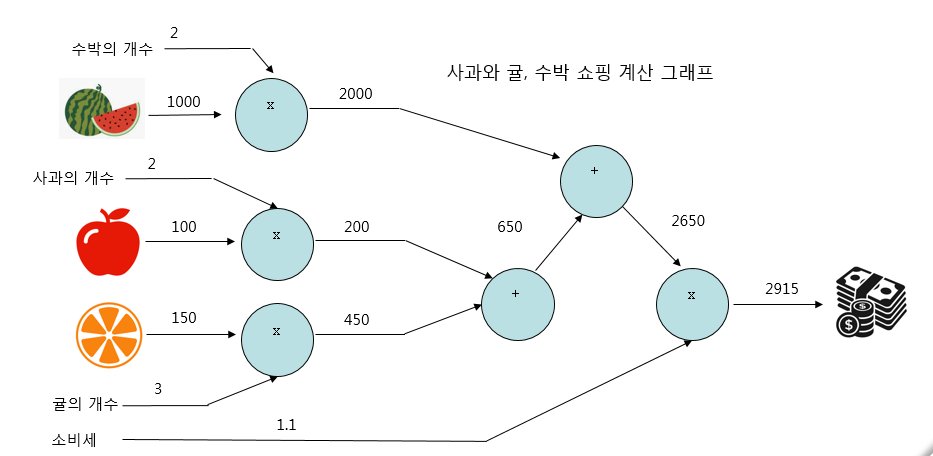


In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y  # x와 y를 바꾼다.
        dy = dout * self.x
        
        return dx, dy

In [2]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [3]:
#quiz 

#수박 1000원, 개수 2 추가한 문제

apple = 100
apple_num = 2
orange = 150
orange_num = 3
wm = 1000 #
wm_num=2 #
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()

mul_tax_layer = MulLayer()

mul_wm_layer = MulLayer() #
add_apple_orange_wmlayer = AddLayer() #

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
wm_price = mul_wm_layer.forward(wm, wm_num) #
appleorange_price = add_apple_orange_layer.forward(apple_price, orange_price)
all_price = add_apple_orange_wmlayer.forward(appleorange_price, wm_price) #
price = mul_tax_layer.forward(all_price, tax)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dappleorange_price, dwm_price = add_apple_orange_layer.backward(dall_price) #

dapple_price, dorange_price = add_apple_orange_layer.backward(dappleorange_price) #

dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
dwm, dwm_num = mul_wm_layer.backward(dwm_price) #

print('%d' % price)
print("%d, %.1f, %.1f, %d, %d, %.1f, %d" % (dapple_num, dapple, dorange_num, dorange, dwm_num, dwm,  dtax))


2915
110, 2.2, 3.3, 165, 1100, 2.2, 2650
